In [1]:
import pandas as pd
import numpy as np
from control.matlab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
#Read in the data
steer = pd.read_excel('step.xlsx', sheet_name = "Steer (deg)")
yawv = pd.read_excel('step.xlsx', sheet_name = "Yaw Velocity (deg per sec)")
roll = pd.read_excel('step.xlsx', sheet_name = "Roll (deg)")
latacc = pd.read_excel('step.xlsx', sheet_name = "Latacc (g)")
sideslip = pd.read_excel('step.xlsx', sheet_name = "SideSlip (deg)")

In [3]:
#Make them numpy arrays
steer = np.array(steer)
yawv = np.array(yawv)
roll = np.array(roll)
latacc = np.array(latacc)
sideslip = np.array(sideslip)

#Transpose them, easier to think of time series this way
steer = steer.T
yawv = yawv.T
roll = roll.T
latacc = latacc.T
sideslip = sideslip.T

#Car data
frontw = 90 # in kilos
rearw = 110 
wheelbase = 1750 # mm
sr = 6
timestep = 0.001 # seconds
speed = 80/3.6

steer = steer/sr # correct for steer ratio

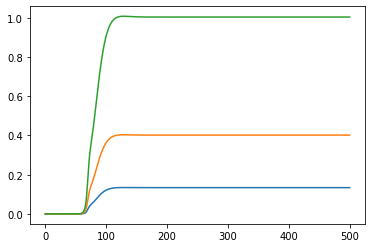

In [4]:
plt.plot(latacc[1,:])
plt.plot(latacc[5,:])
plt.plot(latacc[14,:])

Text(0, 0.5, 'Yaw velocity (deg/sec)')

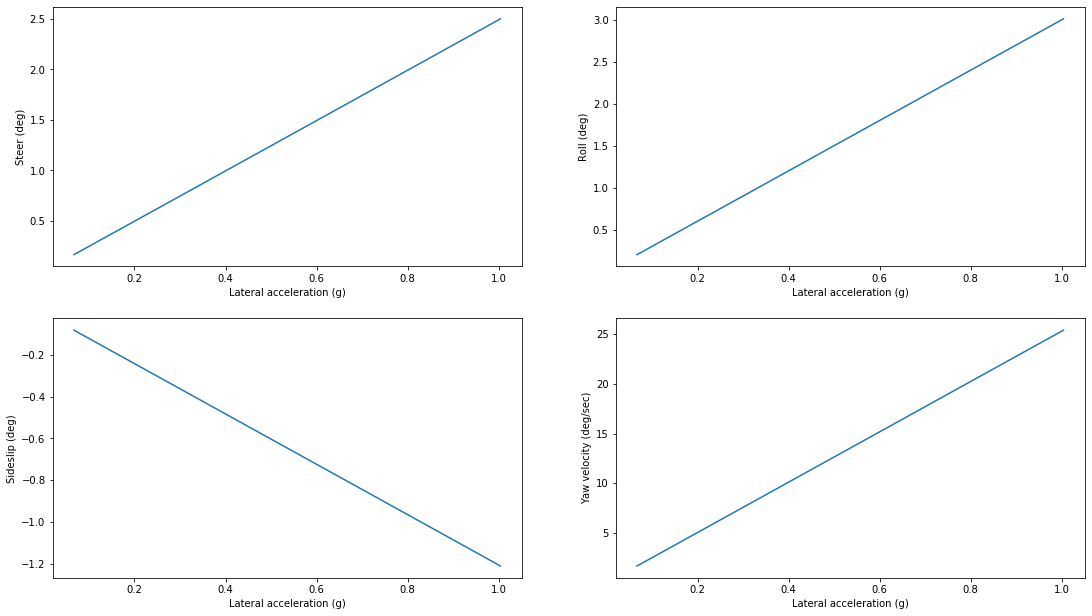

In [5]:
#Take last column as steady state, assumes steady state achieved
ss_steer = steer[:,-1]
ss_yawv = yawv[:,-1]
ss_roll = roll[:,-1]
ss_latacc = latacc[:,-1]
ss_sideslip = sideslip[:,-1]

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

axs[0,0].plot(ss_latacc,ss_steer)
axs[0,0].set_xlabel("Lateral acceleration (g)")
axs[0,0].set_ylabel("Steer (deg)")

axs[0,1].plot(ss_latacc,ss_roll)
axs[0,1].set_xlabel("Lateral acceleration (g)")
axs[0,1].set_ylabel("Roll (deg)")

axs[1,0].plot(ss_latacc,ss_sideslip)
axs[1,0].set_xlabel("Lateral acceleration (g)")
axs[1,0].set_ylabel("Sideslip (deg)")

axs[1,1].plot(ss_latacc,ss_yawv)
axs[1,1].set_xlabel("Lateral acceleration (g)")
axs[1,1].set_ylabel("Yaw velocity (deg/sec)")

## 2. Compute response times and subtract 50% steer response time

In [6]:
tests = np.shape(steer)[0]
ay_90 = np.zeros((tests,1))
yawv_90 = np.zeros((tests,1))
roll_90 = np.zeros((tests,1))
sideslip_90 = np.zeros((tests,1))
steer_50 = np.zeros((tests,1))
for i in range(tests):
    ay_90[i] = np.argmin(np.abs(latacc[i,:] - 0.9*ss_latacc[i])) 
    yawv_90[i] = np.argmin(np.abs(yawv[i,:] - 0.9*ss_yawv[i])) 
    roll_90[i] = np.argmin(np.abs(roll[i,:] - 0.9*ss_roll[i])) 
    sideslip_90[i] = np.argmin(np.abs(sideslip[i,:] - 0.9*ss_sideslip[i])) 
    steer_50[i] = np.argmin(np.abs(steer[i,:] - 0.5*ss_steer[i]))

# Correct timesteps by subtracting steer_50
ay_90c = ay_90 - steer_50
yawv_90c = yawv_90 - steer_50
roll_90c = roll_90 - steer_50
sideslip_90c = sideslip_90 - steer_50

# Go from timesteps to times
ay_90t = ay_90c * timestep
yawv_90t = yawv_90c * timestep
roll_90t = roll_90c * timestep
sideslip_90t = sideslip_90c * timestep

#print(ay_90t)
# As expected for what now seems to confirm as data from a
# linear model, the times are all the same

# Solutions
print("Corrected lateral acceleration response time = ", ay_90t[0], "(s)")
print("Corrected yaw velocity response time = ", yawv_90t[0], "(s)")
print("Corrected roll response time = ", roll_90t[0], "(s)")
print("Corrected sideslip response time = ", sideslip_90t[0], "(s)")

Corrected lateral acceleration response time =  [0.03] (s)
Corrected yaw velocity response time =  [0.018] (s)
Corrected roll response time =  [0.036] (s)
Corrected sideslip response time =  [0.035] (s)


## 3. Since the plots are linear, slope can be computed using just two points each. We pick first and last ones in each array

Steer gain =  2.4906469816492143 deg/g
Yaw velocity gain =  25.2825666870526 deg/s/g
Roll gain =  3.000000588514581 deg/g
Sideslip gain =  -1.2064373156418426 deg/g


Text(0, 0.5, 'Sideslip response time (s)')

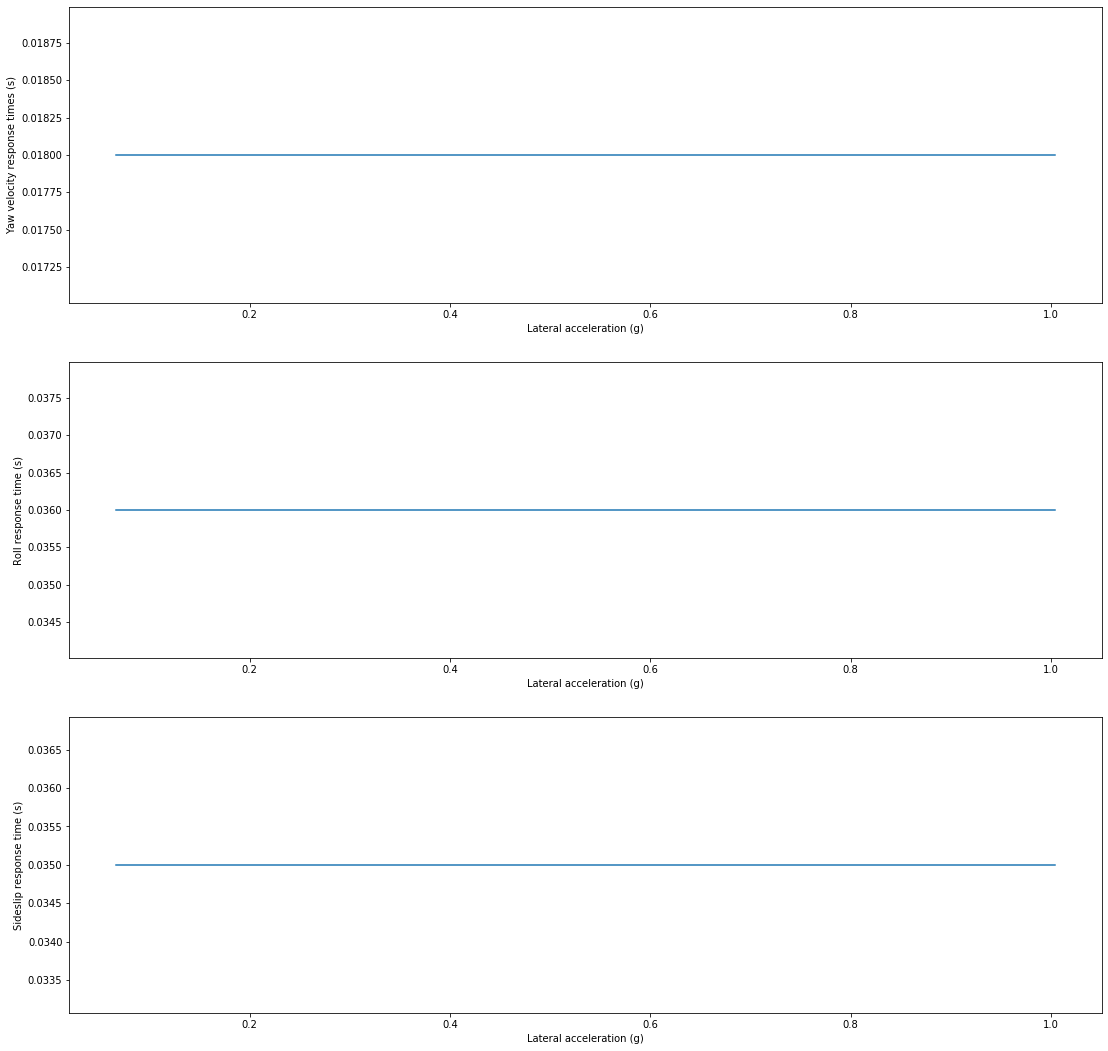

In [7]:
gain_steer_ay = (ss_steer[-1]-ss_steer[0])/(ss_latacc[-1]-ss_latacc[0]) 
gain_yawv_ay = (ss_yawv[-1]-ss_yawv[0])/(ss_latacc[-1]-ss_latacc[0]) 
gain_roll_ay = (ss_roll[-1]-ss_roll[0])/(ss_latacc[-1]-ss_latacc[0]) 
gain_sideslip_ay = (ss_sideslip[-1]-ss_sideslip[0])/(ss_latacc[-1]-ss_latacc[0]) 

print("Steer gain = ", gain_steer_ay, "deg/g")
print("Yaw velocity gain = ", gain_yawv_ay, "deg/s/g")
print("Roll gain = ", gain_roll_ay, "deg/g")
print("Sideslip gain = ", gain_sideslip_ay, "deg/g")

fig, axs = plt.subplots(3,1)
fig.set_size_inches(18.5, 18.5)

axs[0].plot(ss_latacc,yawv_90t)
axs[0].set_xlabel("Lateral acceleration (g)")
axs[0].set_ylabel("Yaw velocity response times (s)")

axs[1].plot(ss_latacc,roll_90t)
axs[1].set_xlabel("Lateral acceleration (g)")
axs[1].set_ylabel("Roll response time (s)")

axs[2].plot(ss_latacc,sideslip_90t)
axs[2].set_xlabel("Lateral acceleration (g)")
axs[2].set_ylabel("Sideslip response time (s)")

## 4. Computation of Ackermann gradient and understeer

In [10]:
Ack_grad = 9.81 * 57.3 * wheelbase / speed**2 /1000
print(" Ackermann gradient is = ", Ack_grad, "deg/g")
K = gain_steer_ay - Ack_grad
print(" Understeer = ", K, "deg/g")

 Ackermann gradient is =  1.9919879437500003 deg/g
 Understeer =  0.49865903789921395 deg/g


## 5. Rear Cornering compliance

In [11]:
A = rearw / (frontw + rearw) * wheelbase
B = frontw / (frontw + rearw) * wheelbase
DR = gain_sideslip_ay - B/wheelbase*Ack_grad
DF = K - DR
print("DR = ", DR, "deg/g")
print("DF = ", DF, "deg/g")

DR =  -2.102831890329343 deg/g
DF =  2.6014909282285568 deg/g
